# Case Study 2 : Google Traffic Analysis

Steps :
- Make Meta2d and Cosinor analysis
- Plot Peaks
- Make Signal Analysis with pyBOAT
- Try using Rain

In [ ]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CosinorPy import file_parser,cosinor

## Make Meta2d and Cosinor analysis

In [ ]:
filename= 'google_traffic_workdays.xlsx'
df = rda.cosinor_read(filename)
df['x']=df['x']*60
rda.export_csv(df,filename)
filename= f'{filename[:-5]}.csv'

In [ ]:
filename= 'google_traffic.xlsx'
df = rda.cosinor_read(filename)
df['x']=df['x']*60
rda.export_csv(df,filename)
filename= f'{filename[:-5]}.csv'

In [ ]:
rda.cosinorpy(filename,sep='\t',period=24*60,n_components=3)
rda.cosinor1py(filename,sep='\t',period=24*60)

In [ ]:
print(filename)
rda.meta2d_format(filename=filename,sep='\t')
filename=f"Out/{filename[:-4]}/{filename[:-4]}.csv"
rda.meta2d(filename=filename)

In [ ]:
filename=filename.split("/")[-1]
print(filename)
df = pd.read_csv(filename,sep='\t',index_col=0)
df_norep = df.index.to_series()
for i in range(0,1421,10):
    avg_filter = df.filter(regex=f'T{i}').mean(axis = 1)
    avg_filter.name = i
    df_norep = pd.merge(df_norep, avg_filter,left_index=True,right_index=True)
df_norep=df_norep.drop('gene',axis=1)
df_norep=df_norep.interpolate(method='linear', axis=1)
df_norep.to_csv(filename)
rda.meta2d(filename=filename,models=['ARS'])

## Plot Peaks

In [94]:
#function
def plot_peaks(df,filename):
    names = df.test.unique()
    print(names)
    models_peak = [{"Path":f"Out/{filename[:-4]}/cosinorpyout/COSINORresult_{filename[:-4]}.csv","x_peak":"peaks","y_peak":"heights","label":"test","model":"cosinor","mesor":"nan"}]
    models_peak.append({"Path":f"Out/{filename[:-4]}/cosinorpyout/COSINOR1result_{filename[:-4]}.csv","x_peak":"acrophase[h]","y_peak":"amplitude","label":"test","model":"cosinor1","mesor":"mean"})
    models_peak.append({"Path":f"Out/{filename[:-4]}/metaout/JTKresult_{filename[:-4]}.csv","x_peak":"LAG","y_peak":"AMP","label":"CycID","model":"JTK","mesor":"mean"})
    models_peak.append({"Path":f"Out/{filename[:-4]}/metaout/LSresult_{filename[:-4]}.csv","x_peak":"PeakSPD","y_peak":"PhaseShiftHeight","label":"CycID","model":"LS","mesor":"nan"})
    for name in names:
        ncols = 4
        nrows = 1
        fig, axes = plt.subplots(ncols = ncols, nrows = nrows, sharex=True,sharey=True)
        axes = axes.flatten()         
        fig.set_size_inches(15, 3)
        sns.set_style("white")
        flatui = ['#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525']
        mesor= df[ df['test']==name].y.mean()
        for ax,model in zip(axes,models_peak):
            print(name,model.get("model"))
            path=model.get("Path")
            df_peaks=pd.read_csv(path)
            dff=df[df['test']==name]
            df_peak=df_peaks[df_peaks[model.get("label")]==name]
            x_peak= str(df_peak[model.get("x_peak")].iloc[0]).strip('][').split(' ')
            y_peak=str(df_peak[model.get("y_peak")].iloc[0]).strip('][').split(' ')
            while("" in x_peak) :
                x_peak.remove("")
            while("" in y_peak) :
                y_peak.remove("")
            if(model.get("x_peak")=="LAG"):
                x_peak= [float(x)*60 if float(x)>0 else -float(x) for x in x_peak]
            else:
                x_peak= [float(x) if float(x)>0 else -float(x) for x in x_peak]
            print('x_peak:',x_peak,model.get("x_peak"))
            if model.get("mesor")=='mean':
                y_peak= [float(y)+mesor for y in y_peak]
            else:
                y_peak= [float(y) for y in y_peak]
            print('y_peak:',y_peak,model.get("y_peak"))
            sns.color_palette(flatui)
            sns.scatterplot(data=dff,x='x',y='y',ax=ax,color = 'grey')
            ax.set_xlabel('Time [min]')
            ax.set_ylabel('Pace [s/m]')
            ax.plot(x_peak,y_peak,'ko')
            ax.set_title(model.get("model"))
        fig.subplots_adjust(top=0.95)
        plt.savefig(f"Out/{filename[:-4]}/Peaks_plot_{name}.png", bbox_inches="tight", facecolor='white')
        plt.show()

Make peaks of google traffic workdays

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

['route_0_weekend' 'route_1_weekend' 'route_2_weekend' 'route_3_weekend'
 'route_4_weekend' 'route_5_weekend' 'route_0_workday' 'route_1_workday'
 'route_2_workday' 'route_3_workday' 'route_4_workday' 'route_5_workday']
route_0_weekend cosinor
x_peak: [792.79279279] peaks
y_peak: [0.1239181] heights
route_0_weekend cosinor1
x_peak: [466.44835217177547] acrophase[h]
y_peak: [0.12519778971043735] amplitude
route_0_weekend JTK
x_peak: [900.0] LAG
y_peak: [0.12430906019173525] AMP
route_0_weekend LS
x_peak: [234.671841347077] PeakSPD
y_peak: [0.123869238910554] PhaseShiftHeight


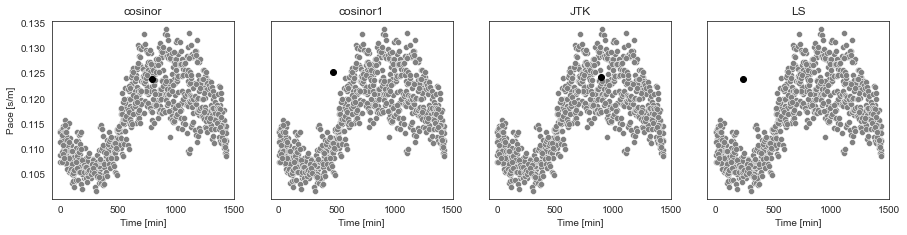

route_1_weekend cosinor
x_peak: [746.66666667, 1170.45045045] peaks
y_peak: [0.14174384, 0.13482652] heights
route_1_weekend cosinor1
x_peak: [489.6092482172238] acrophase[h]
y_peak: [0.13909162916111983] amplitude
route_1_weekend JTK
x_peak: [870.0] LAG
y_peak: [0.13898254063833765] AMP
route_1_weekend LS
x_peak: [217.171368707187] PeakSPD
y_peak: [0.138995939967513] PhaseShiftHeight


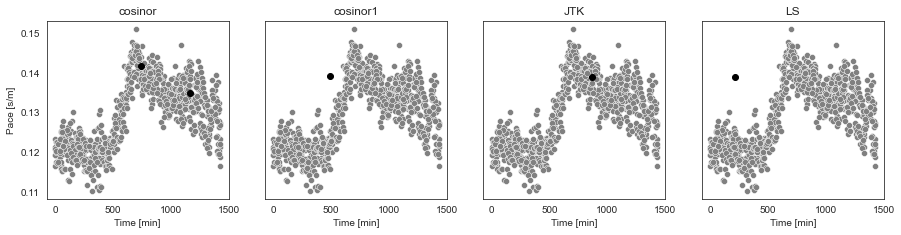

route_2_weekend cosinor
x_peak: [735.13513514, 1161.8018018] peaks
y_peak: [0.14327633, 0.14333343] heights
route_2_weekend cosinor1
x_peak: [481.30911594776353] acrophase[h]
y_peak: [0.14353612069514324] amplitude
route_2_weekend JTK
x_peak: [900.0] LAG
y_peak: [0.14323173367436684] AMP
route_2_weekend LS
x_peak: [119.359957567438] PeakSPD
y_peak: [0.14251846858829] PhaseShiftHeight


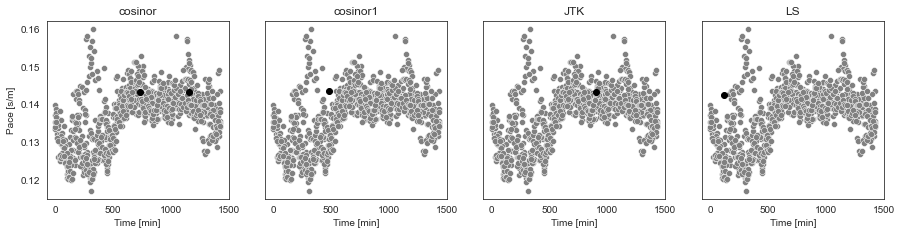

route_3_weekend cosinor
x_peak: [752.43243243, 1060.9009009] peaks
y_peak: [0.15326075, 0.14694012] heights
route_3_weekend cosinor1
x_peak: [532.7055595517174] acrophase[h]
y_peak: [0.15192746018392733] amplitude
route_3_weekend JTK
x_peak: [840.0] LAG
y_peak: [0.15040039107261072] AMP
route_3_weekend LS
x_peak: [197.753207642567] PeakSPD
y_peak: [0.151553500475521] PhaseShiftHeight


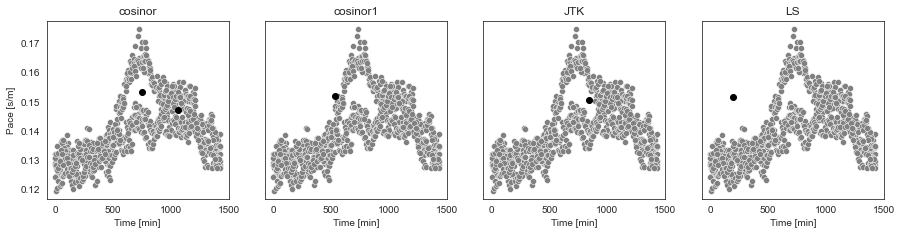

route_4_weekend cosinor
x_peak: [746.66666667, 1107.02702703] peaks
y_peak: [0.13628437, 0.13556473] heights
route_4_weekend cosinor1
x_peak: [501.308875558287] acrophase[h]
y_peak: [0.13759951715878788] amplitude
route_4_weekend JTK
x_peak: [870.0] LAG
y_peak: [0.13699821153082878] AMP
route_4_weekend LS
x_peak: [199.668981180541] PeakSPD
y_peak: [0.136179408753372] PhaseShiftHeight


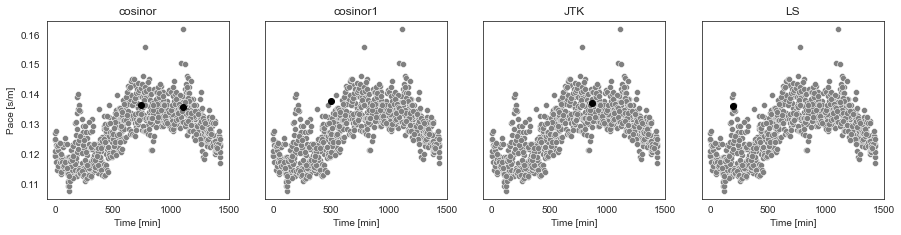

route_5_weekend cosinor
x_peak: [726.48648649, 1173.33333333] peaks
y_peak: [0.05758921, 0.05743777] heights
route_5_weekend cosinor1
x_peak: [481.44314048637534] acrophase[h]
y_peak: [0.05728001984813848] amplitude
route_5_weekend JTK
x_peak: [870.0] LAG
y_peak: [0.05735341353254628] AMP
route_5_weekend LS
x_peak: [102.464854828767] PeakSPD
y_peak: [0.056981866434682] PhaseShiftHeight


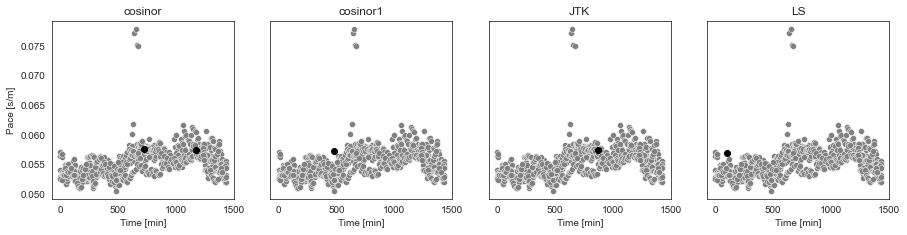

route_0_workday cosinor
x_peak: [467.02702703, 945.58558559] peaks
y_peak: [0.13079361, 0.13978883] heights
route_0_workday cosinor1
x_peak: [600.0024841354843] acrophase[h]
y_peak: [0.13262794557992236] amplitude
route_0_workday JTK
x_peak: [750.0] LAG
y_peak: [0.13036597075584055] AMP
route_0_workday LS
x_peak: [406.093934609985] PeakSPD
y_peak: [0.131226366157141] PhaseShiftHeight


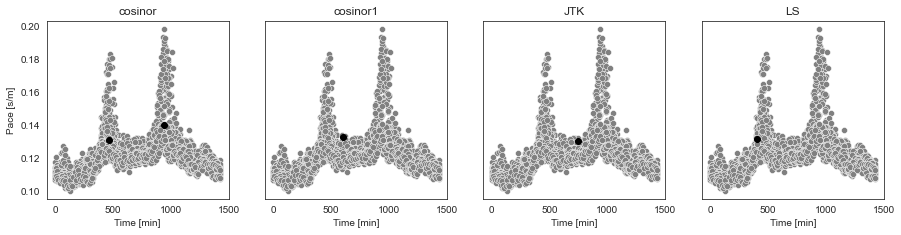

route_1_workday cosinor
x_peak: [536.21621622, 916.75675676] peaks
y_peak: [0.14055402, 0.14382156] heights
route_1_workday cosinor1
x_peak: [603.7295000789735] acrophase[h]
y_peak: [0.14342669722556262] amplitude
route_1_workday JTK
x_peak: [750.0] LAG
y_peak: [0.1423783105291346] AMP
route_1_workday LS
x_peak: [593.918826328764] PeakSPD
y_peak: [0.14200835301212] PhaseShiftHeight


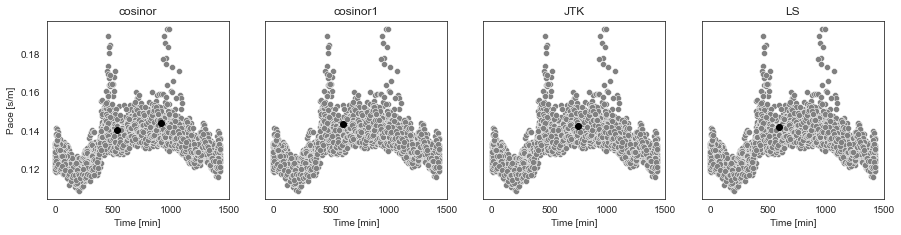

route_2_workday cosinor
x_peak: [498.73873874, 960.0] peaks
y_peak: [0.17111403, 0.18384488] heights
route_2_workday cosinor1
x_peak: [603.9887274618354] acrophase[h]
y_peak: [0.17388667775654174] amplitude
route_2_workday JTK
x_peak: [750.0] LAG
y_peak: [0.17152047764438813] AMP
route_2_workday LS
x_peak: [518.376832738425] PeakSPD
y_peak: [0.169704941090425] PhaseShiftHeight


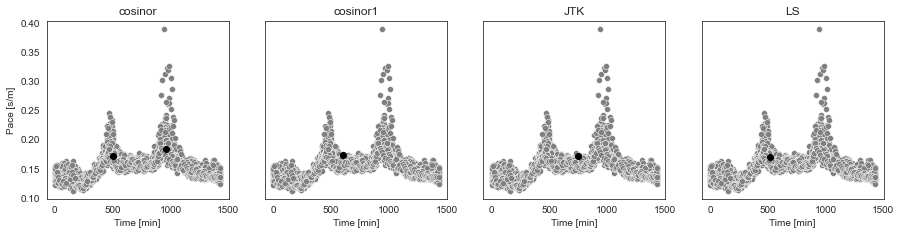

route_3_workday cosinor
x_peak: [942.7027027] peaks
y_peak: [0.2015305] heights
route_3_workday cosinor1
x_peak: [581.8965665638616] acrophase[h]
y_peak: [0.19004357521141094] amplitude
route_3_workday JTK
x_peak: [750.0] LAG
y_peak: [0.18311235194125955] AMP
route_3_workday LS
x_peak: [673.648773062091] PeakSPD
y_peak: [0.19135249794418] PhaseShiftHeight


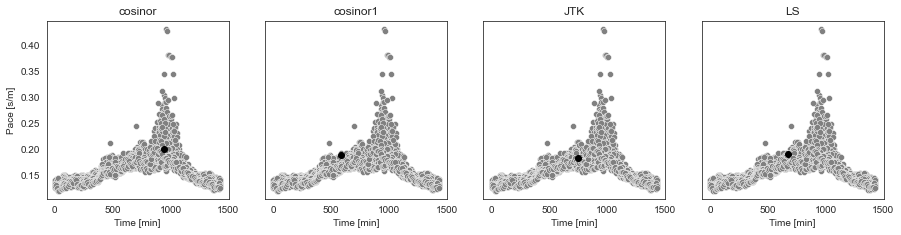

route_4_workday cosinor
x_peak: [501.62162162, 971.53153153] peaks
y_peak: [0.17081084, 0.17013063] heights
route_4_workday cosinor1
x_peak: [655.592066602484] acrophase[h]
y_peak: [0.16745899846598353] amplitude
route_4_workday JTK
x_peak: [690.0] LAG
y_peak: [0.16564347079957814] AMP
route_4_workday LS
x_peak: [450.216514311931] PeakSPD
y_peak: [0.162843703244684] PhaseShiftHeight


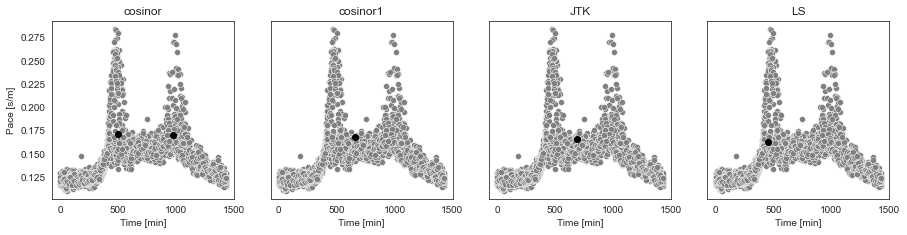

route_5_workday cosinor
x_peak: [464.14414414, 934.05405405] peaks
y_peak: [0.0631552, 0.06801207] heights
route_5_workday cosinor1
x_peak: [616.6183203894842] acrophase[h]
y_peak: [0.06448668903775562] amplitude
route_5_workday JTK
x_peak: [690.0] LAG
y_peak: [0.06296157941487893] AMP
route_5_workday LS
x_peak: [234.873128492417] PeakSPD
y_peak: [0.0639996739632966] PhaseShiftHeight


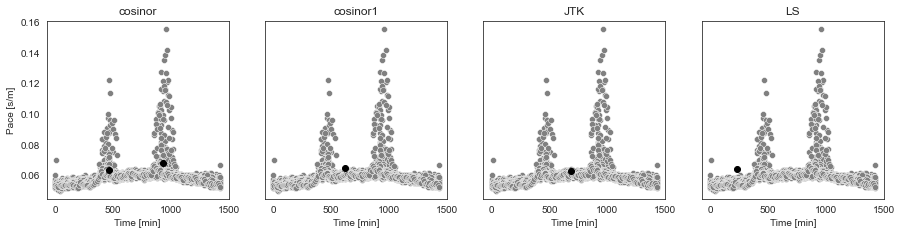

In [95]:
filename='google_traffic_workdays.xlsx'
df = rda.cosinor_read(filename)
df['x']=df['x']*60
filename = f'{filename[:-5]}.csv'
plot_peaks(df,filename=filename)

Make peaks of google traffic

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

['route_0' 'route_1' 'route_2' 'route_3' 'route_4' 'route_5']
route_0 cosinor
x_peak: [475.67567568, 945.58558559] peaks
y_peak: [0.12659982, 0.13621803] heights
route_0 cosinor1
x_peak: [574.7157282995335] acrophase[h]
y_peak: [0.13079924774735513] amplitude
route_0 JTK
x_peak: [1020.0] LAG
y_peak: [0.12834752300636812] AMP
route_0 LS
x_peak: [449.408817487544] PeakSPD
y_peak: [0.129739385652448] PhaseShiftHeight


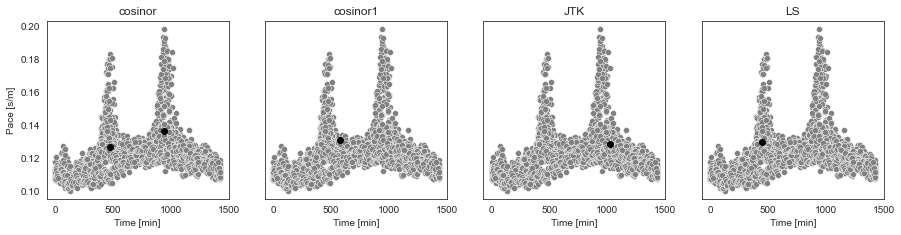

route_1 cosinor
x_peak: [890.81081081] peaks
y_peak: [0.1420936] heights
route_1 cosinor1
x_peak: [579.9879024636365] acrophase[h]
y_peak: [0.14230982903161452] amplitude
route_1 JTK
x_peak: [990.0] LAG
y_peak: [0.1422814049040064] AMP
route_1 LS
x_peak: [694.262990744263] PeakSPD
y_peak: [0.141104379357707] PhaseShiftHeight


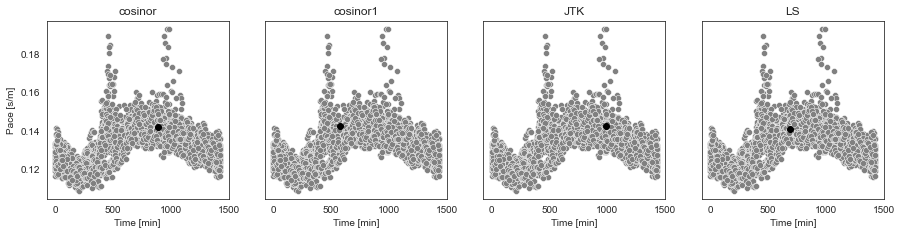

route_2 cosinor
x_peak: [504.5045045, 960.0] peaks
y_peak: [0.16334372, 0.17471534] heights
route_2 cosinor1
x_peak: [593.8728152561658] acrophase[h]
y_peak: [0.1672851235361173] amplitude
route_2 JTK
x_peak: [1020.0] LAG
y_peak: [0.1644539451107507] AMP
route_2 LS
x_peak: [479.219180056578] PeakSPD
y_peak: [0.164102152405716] PhaseShiftHeight


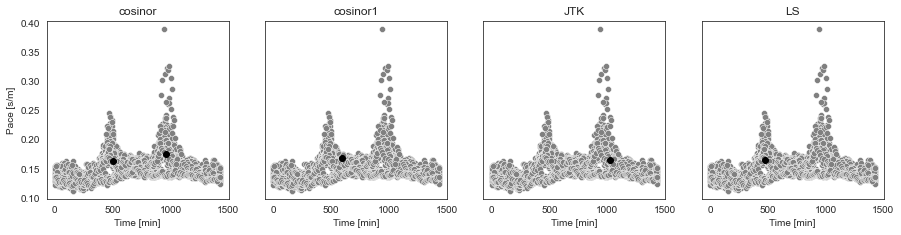

route_3 cosinor
x_peak: [939.81981982] peaks
y_peak: [0.19033421] heights
route_3 cosinor1
x_peak: [576.2442913320313] acrophase[h]
y_peak: [0.18193384877315677] amplitude
route_3 JTK
x_peak: [1080.0] LAG
y_peak: [0.1778639890745803] AMP
route_3 LS
x_peak: [697.025283822957] PeakSPD
y_peak: [0.183227265730881] PhaseShiftHeight


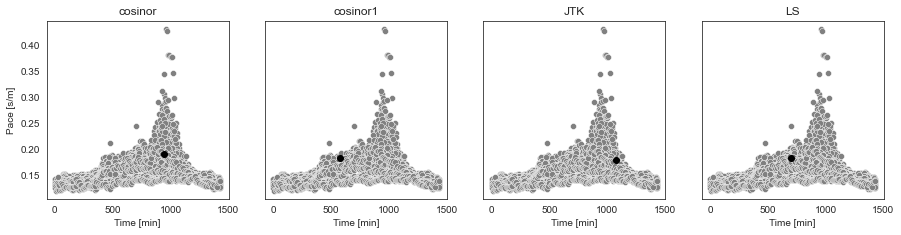

route_4 cosinor
x_peak: [507.38738739, 971.53153153] peaks
y_peak: [0.16120075, 0.16266564] heights
route_4 cosinor1
x_peak: [639.4728504833612] acrophase[h]
y_peak: [0.16073567877805398] amplitude
route_4 JTK
x_peak: [960.0] LAG
y_peak: [0.15851960187474337] AMP
route_4 LS
x_peak: [420.035936980404] PeakSPD
y_peak: [0.156089560428257] PhaseShiftHeight


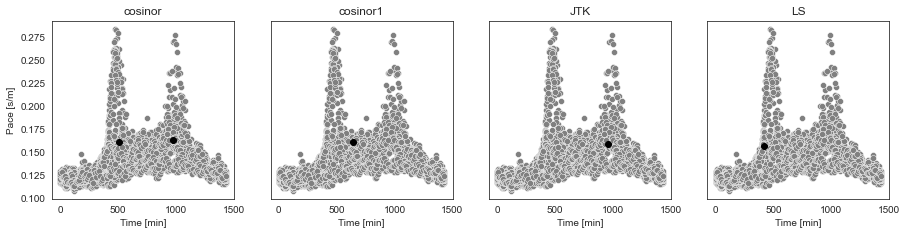

route_5 cosinor
x_peak: [469.90990991, 934.05405405] peaks
y_peak: [0.06118193, 0.06546791] heights
route_5 cosinor1
x_peak: [603.3642523725956] acrophase[h]
y_peak: [0.06289970667751178] amplitude
route_5 JTK
x_peak: [1020.0] LAG
y_peak: [0.06134072994657008] AMP
route_5 LS
x_peak: [233.050955340382] PeakSPD
y_peak: [0.0625772808725006] PhaseShiftHeight


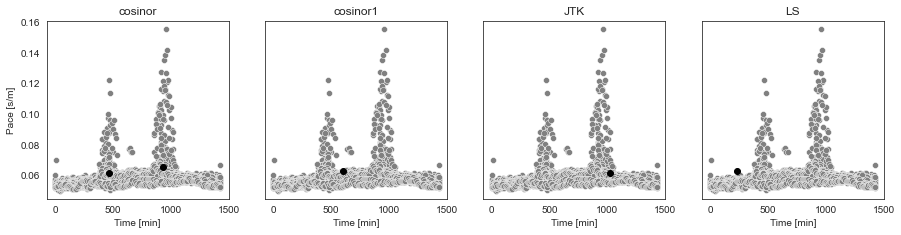

In [96]:
filename='google_traffic.xlsx'
df = rda.cosinor_read(filename)
df['x']=df['x']*60
filename = f'{filename[:-5]}.csv'
plot_peaks(df,filename=filename)

## Make Signal Analysis with pyBOAT

In [ ]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CosinorPy import file_parser,cosinor
filename='google_traffic.csv'
print(filename)
df = pd.read_csv(filename,sep='\t',index_col=0)
df_norep = df.index.to_series()
for i in range(0,1421,10):
    avg_filter = df.filter(regex=f'T{i}').mean(axis = 1)
    avg_filter.name = i
    df_norep = pd.merge(df_norep, avg_filter,left_index=True,right_index=True)
df_norep=df_norep.drop('gene',axis=1)

In [ ]:
df_ridge1 = rda.analysis(df_norep,filename=filename,time_unit_label='minutes')
df_ridge1

In [ ]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CosinorPy import file_parser,cosinor
filename='google_traffic_workdays.csv'
print(filename)
df = pd.read_csv(filename,sep='\t',index_col=0)
df_norep = df.index.to_series()
for i in range(0,1421,10):
    avg_filter = df.filter(regex=f'T{i}').mean(axis = 1)
    avg_filter.name = i
    df_norep = pd.merge(df_norep, avg_filter,left_index=True,right_index=True)
df_norep=df_norep.drop('gene',axis=1)
df_norep=df_norep.interpolate(method='linear', axis=1)
df_norep.to_csv('norep_'+filename)
rda.meta2d(filename='norep_'+filename,models=['ARS'])

## Try RAIN

In [ ]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CosinorPy import file_parser,cosinor
filename='google_traffic_workdays.csv'
print(filename)
df = pd.read_csv(filename,sep='\t',index_col=0)
df_norep = df.index.to_series()
for i in range(0,1421,10):
    avg_filter = df.filter(regex=f'T{i}').mean(axis = 1)
    avg_filter.name = i
    df_norep = pd.merge(df_norep, avg_filter,left_index=True,right_index=True)
df_norep=df_norep.drop('gene',axis=1)
df_norep=df_norep.interpolate(method='linear', axis=1)
df_norep.to_csv('norep_'+filename)

In [ ]:
rda.rain(filename='norep_'+filename,sample_rate=10,n_replicate=1,period=1440)